In [105]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
import zipfile

In [106]:
import xarray as xr
import rioxarray as rxr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import earthpy as et
import regionmask
import contextily as cx
import importlib

In [107]:
from utils.constants import *
from utils.countries import *
from simon.utils.functions import *

In [108]:
os.chdir(ABSOLUTE_FOLDER_REPOSITORY)

In [109]:
nuts = load_nuts_mask(level=3, subset=[*EU, 'UK'])

## Yearly heath waves - EUROPE

In [110]:
df = pd.read_csv(os.path.join(FOLDER_PROCESSED_DATA, 'final_dataset.csv'))
df = pd.merge(nuts, df, how = 'left', on = ['NUTS_ID'])

In [138]:
#print(df.columns)

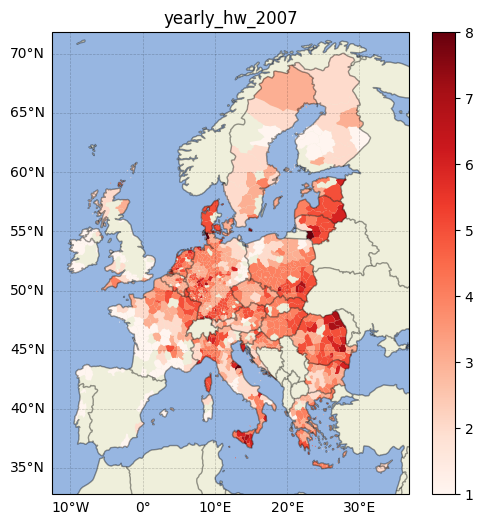

<Figure size 640x480 with 0 Axes>

In [141]:
#########################################################################
variable = 'yearly_hw' #input name of variable as string
year = 2007 #input year as integer
#########################################################################

#If data are not available the codes produces an error or values in the range [-.1, .1]

plot_map(
    df = df[df.YEAR == year],
    variable = variable,
    cmap = 'Reds', #'BrBG', 'Reds'
    save = False,
    title = f'{variable}_{str(year)}',
    output_file_name = f'{variable}_{str(year)}'
)

plt.savefig("HW2007.png")

# Number of HW against Average length of HW


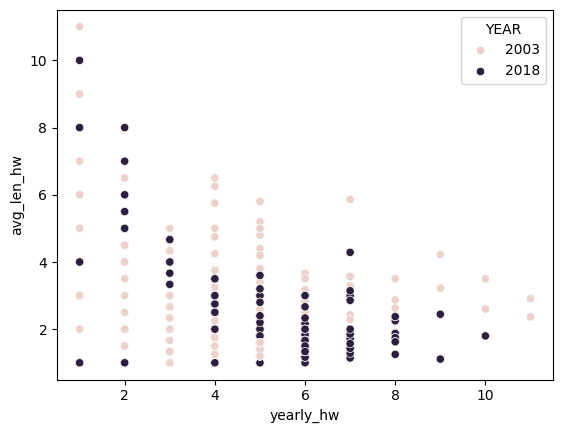

In [149]:
y1 = 2003
y2 = 2018

df_chart = df[df.YEAR.isin([y1, y2])]
df_chart = df_chart[['NUTS_ID','YEAR','yearly_hw','avg_len_hw']]

x_variable = 'yearly_hw' #input name of variable as string
y_variable = 'avg_len_hw'
#print(df_chart)

sns.scatterplot(x = x_variable, y = y_variable, data = df_chart, hue = "YEAR")

plt.savefig("HW_count_vs_Avg_len_HW.png")

# Number of HW against Average HW intesity


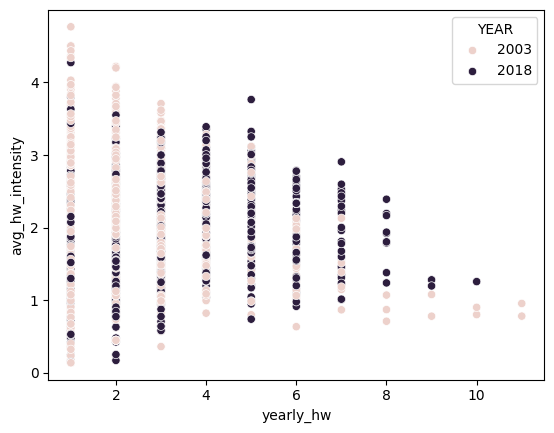

In [153]:
y1 = 2003
y2 = 2018

df_chart = df[df.YEAR.isin([y1, y2])]
df_chart = df_chart[['NUTS_ID','YEAR','yearly_hw','avg_hw_intensity']]

x_variable = 'yearly_hw' #input name of variable as string
y_variable = 'avg_hw_intensity'
#print(df_chart)

sns.scatterplot(x = x_variable, y = y_variable, data = df_chart, hue = "YEAR")

plt.savefig("2003_2018_HW_count_vs_Avg_intensity_HW.png")